In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import random


data=pd.read_csv("I://西瓜.csv")

def showData(data):
    plt.scatter(data[data.好瓜==1]['密度'],data[data.好瓜==1]['含糖率'],color = 'g')
    plt.scatter(data[data.好瓜==-1]['密度'],data[data.好瓜==-1]['含糖率'],color = 'b',marker='x')
    
def getRes(att,bound,less_flag,data):
    res=np.zeros([len(data[att])])
    if less_flag:
        res[data[att]<bound]=-1
        res[data[att]>bound]=1
    else:
        res[data[att]>bound]=-1
        res[data[att]<bound]=1
    return res


def getBound(att,data):
    sort_num=np.sort(data[att])
    #print(sort_num)
    split_num=[(sort_num[i]+sort_num[i+1])/2 for i in range(len(sort_num)-1)]
    less_flag=None
    #print(split_num)
    min_err=10000000
    min_index=0

    for i in range(len(split_num)):
        left_res=getRes(att,split_num[i],less_flag=True,data=data)
        right_res=getRes(att,split_num[i],less_flag=False,data=data)
        #print(res)
        left_err=sum((left_res!=data['好瓜']))
        right_err=sum((right_res!=data['好瓜']))

        if left_err<min_err:
            min_err=left_err
            min_index=i
            less_flag=True
        if right_err<min_err:
            min_err=right_err
            min_index=i
            less_flag=False
        #print(err)
        #print("---------------")
    

    print('min_index:',min_index)
    print('bound:',split_num[min_index])
    print("----------")
    return split_num[min_index],less_flag



In [3]:
def randomSample(data):
    new_data=pd.DataFrame(columns=['密度','含糖率','好瓜'])
    print(len(data))
    for i in range(len(data)):
        ri=random.randint(0,len(data)-1)

        new_data.loc[i]=data.iloc[ri]


    return new_data



17
min_index: 4
bound: 0.5745
----------
17
min_index: 0
bound: 0.0495
----------
17
min_index: 1
bound: 0.38149999999999995
----------
17
min_index: 2
bound: 0.126
----------
17
min_index: 4
bound: 0.4205
----------
17
min_index: 9
bound: 0.20450000000000002
----------
17
min_index: 1
bound: 0.38149999999999995
----------
17
min_index: 6
bound: 0.15700000000000003
----------
17
min_index: 7
bound: 0.5745
----------
17
min_index: 3
bound: 0.126
----------
17
min_index: 7
bound: 0.5745
----------
17
min_index: 6
bound: 0.186
----------
17
min_index: 5
bound: 0.3985
----------
17
min_index: 4
bound: 0.20650000000000002
----------
17
min_index: 3
bound: 0.38149999999999995
----------


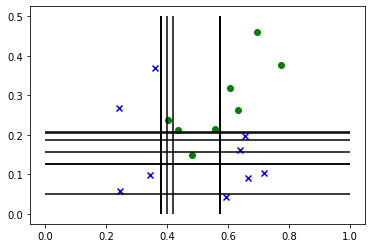

In [9]:
showData(data)
n=15
for i in range(n):
    new_data=randomSample(data)
    if i%2==0:
        att='密度'
        
    else:
        att='含糖率'
    bound,less_flag=getBound(att,new_data)
    
    if i%2==0:
        
        plt.vlines(bound,0,0.5)
    else:
        plt.hlines(bound,0,1)
    